In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/ashutoshshukla/Desktop/Data/fixed_reduced_grid/192_Scenario/Final_Input1.csv")
unique_substations = list(df["SubNum"].unique())

substations = []
for i in unique_substations:
    substations.append(list(df[df["SubNum"] == i].iloc[0,9:]))
    
substations = pd.DataFrame(substations)
substations.columns = df.columns[9:]
substations["id"] = unique_substations
substations = substations.set_index("id")
substations = substations[substations.sum(axis=1) > 0]

* If you will fit a trend line, the statement that flooding decreases with increase in forward speed is true for higher category storms and somewhat true for lower category storms

* We can safely eliminate cateogry 0,1 hurricanes. Even 2 is not ok. So we have three hurricane categories

* Can we get rid of the directions?

* If we have forward speed of 5 and 10, I think one of the two for sure has higher flooding than 15 or 25

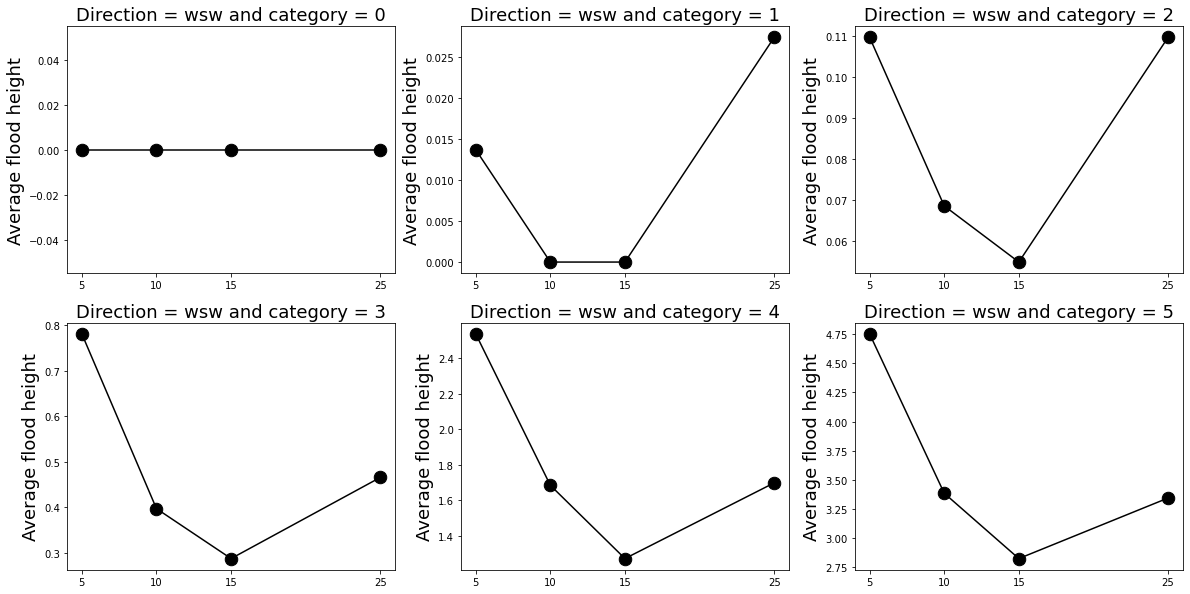

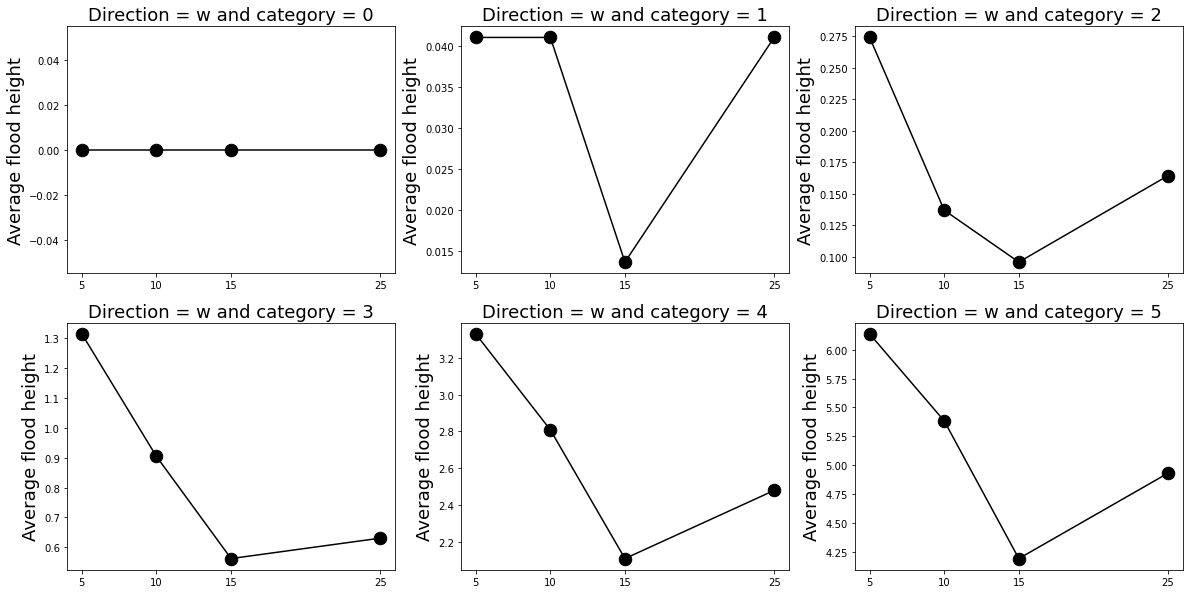

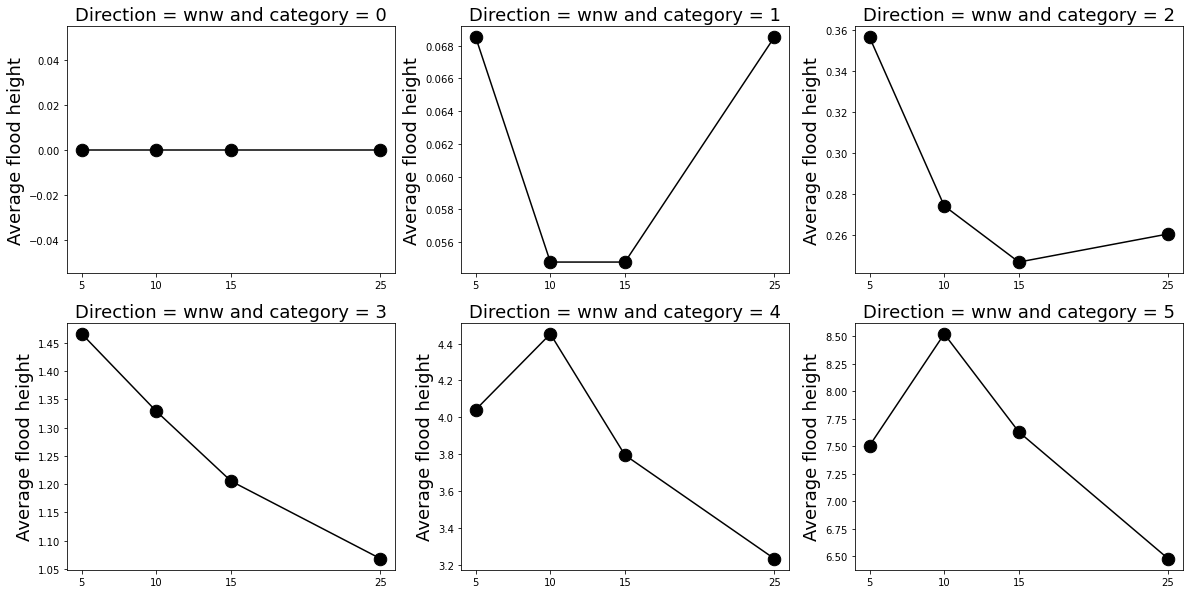

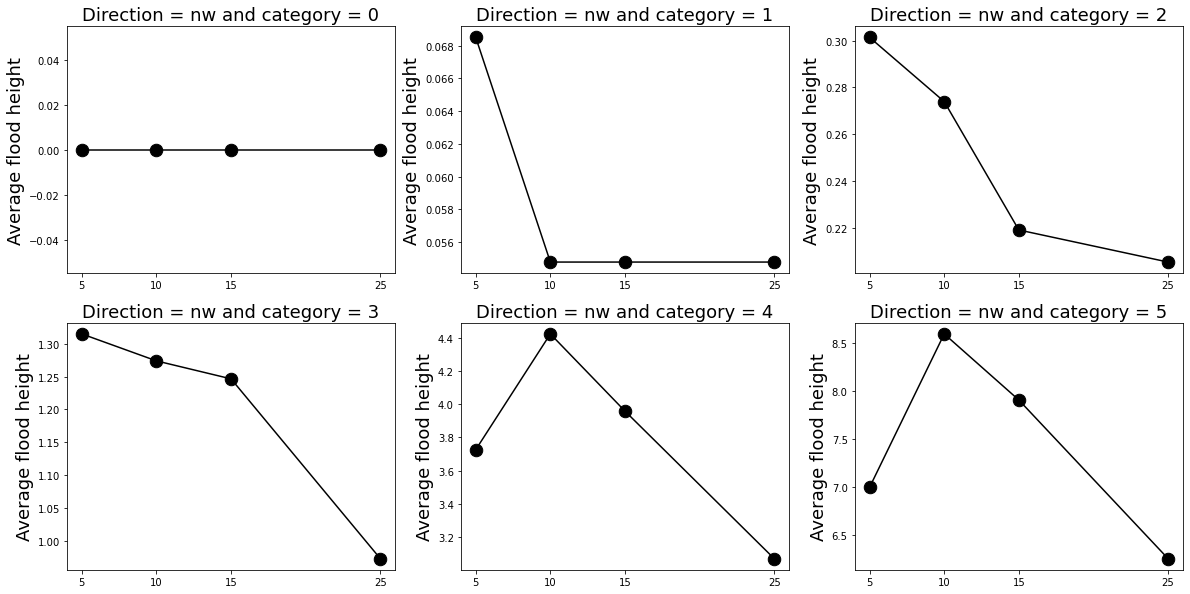

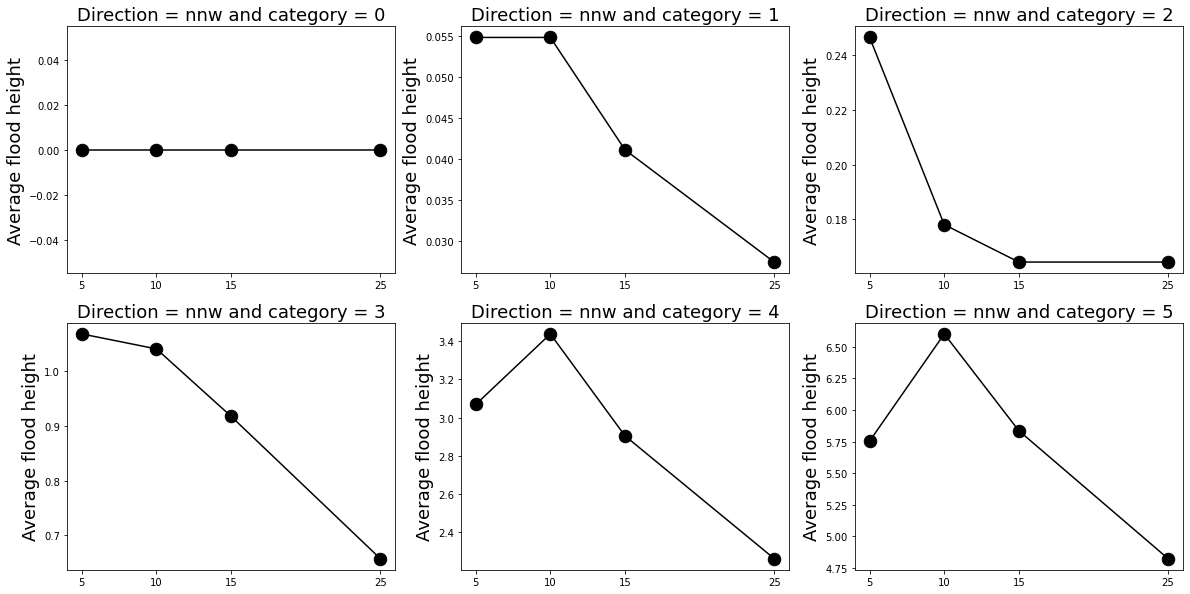

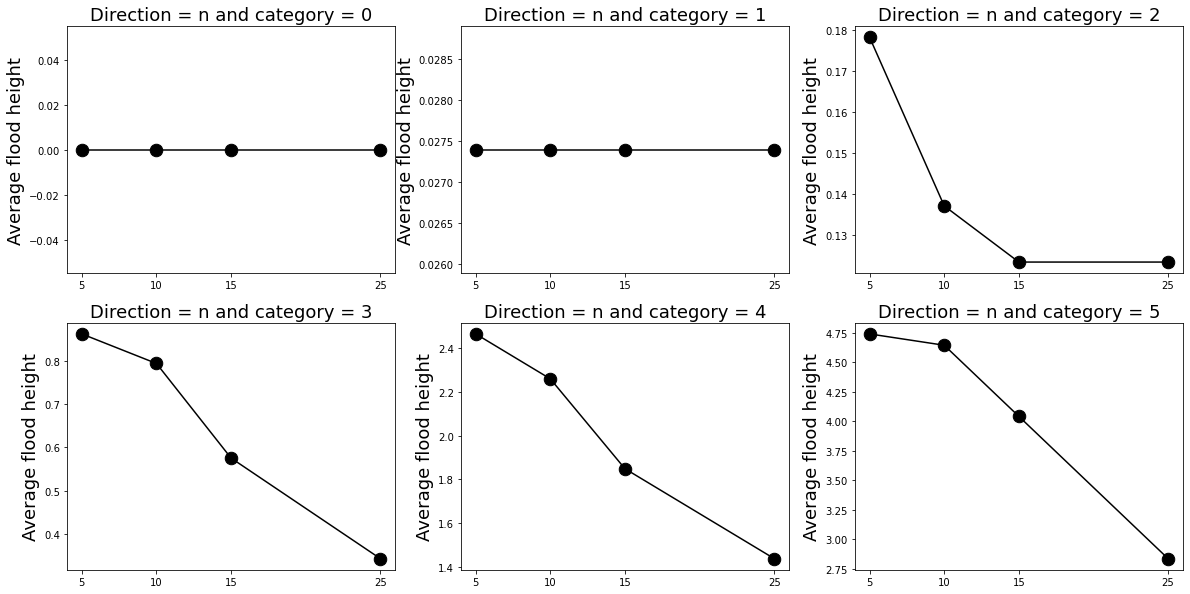

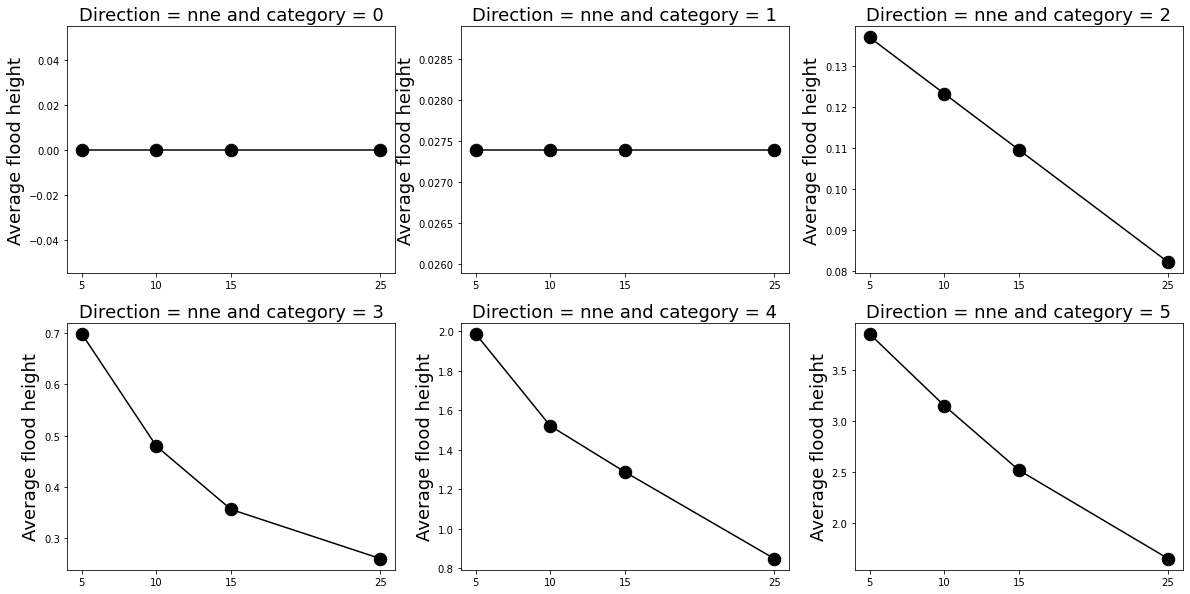

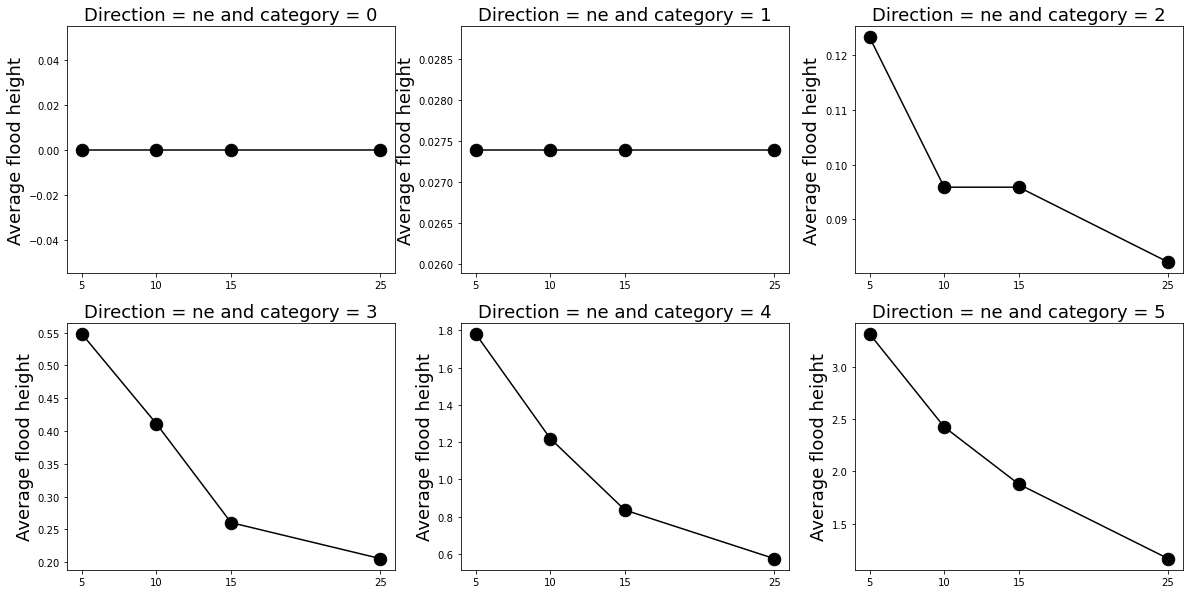

In [11]:
forward_speeds = ["05", "10", "15", "25"]
categories = ["0", "1", "2", "3", "4", "5"]
#categories = ["3", "4", "5"]
#categories = ["0", "1", "2"]
directions = ["wsw", "w", "wnw", "nw", "nnw", "n", "nne", "ne"]
plot_type = "mean"

for direction in directions:
    fig, axs = plt.subplots(2,3, figsize=(20,10))
    for category in categories:
        # print("_" + direction + "_" + category)
        if int(category) < 3:
            y_id = int(category)
            x_id = 0
        else:
            y_id = int(category) - 3
            x_id = 1
        if plot_type == "max":
            axs[x_id, y_id].plot([5,10,15,25], substations.filter(like="_" + direction + "_" + category).max(), marker=".", markersize=25, color="k")
        else:
            axs[x_id, y_id].plot([5,10,15,25], substations.filter(like="_" + direction + "_" + category).mean(), marker=".", markersize=25, color="k")
        axs[x_id, y_id].set_title("Direction = " + direction + " and category = " + category, fontsize=18)
        axs[x_id, y_id].set_xticks([5,10,15,25])
        axs[x_id, y_id].set_ylabel("Average flood height", fontsize=18)
        

### Question: Do 5 and 10 lead to similar flooding as 15, 25

In [41]:
forward_speeds = ["05", "10", "15", "25"]
categories = ["0", "1", "2", "3", "4", "5"]
categories = ["3", "4", "5"]
#categories = ["0", "1", "2"]
directions = ["wsw", "w", "wnw", "nw", "nnw", "n", "nne", "ne"]

def jaccard(temp_df, temp_df_columns, i, j):
    intersection = len(set(temp_df[temp_df[temp_df_columns[i]] > 0].index).intersection(set(temp_df[temp_df[temp_df_columns[j]] > 0].index)))
    union = len(set(temp_df[temp_df[temp_df_columns[i]] > 0].index).union(set(temp_df[temp_df[temp_df_columns[j]] > 0].index)))
    return intersection/union

for direction in directions:
    for category in categories:
        temp_df = substations.filter(like="_" + direction + "_" + category)
        temp_df_columns = temp_df.columns
        j1 = round(jaccard(temp_df, temp_df_columns, 0, 2), 2)
        j2 = round(jaccard(temp_df, temp_df_columns, 0, 3), 2)
        j3 = round(jaccard(temp_df, temp_df_columns, 1, 2), 2)
        j4 = round(jaccard(temp_df, temp_df_columns, 1, 3), 2)
        print("Minimum and Maximum Jaccard Score is for " + direction + "_" + category + " " + str(min(j1, j2, j3, j4)) + "," + str(max(j1, j2, j3, j4)))

Minimum and Maximum Jaccard Score is for wsw_3 0.44,0.64
Minimum and Maximum Jaccard Score is for wsw_4 0.6,0.77
Minimum and Maximum Jaccard Score is for wsw_5 0.63,0.91
Minimum and Maximum Jaccard Score is for w_3 0.45,0.62
Minimum and Maximum Jaccard Score is for w_4 0.78,0.93
Minimum and Maximum Jaccard Score is for w_5 0.72,0.82
Minimum and Maximum Jaccard Score is for wnw_3 0.73,0.84
Minimum and Maximum Jaccard Score is for wnw_4 0.75,0.95
Minimum and Maximum Jaccard Score is for wnw_5 0.79,0.95
Minimum and Maximum Jaccard Score is for nw_3 0.81,0.89
Minimum and Maximum Jaccard Score is for nw_4 0.75,0.93
Minimum and Maximum Jaccard Score is for nw_5 0.75,0.95
Minimum and Maximum Jaccard Score is for nnw_3 0.68,0.84
Minimum and Maximum Jaccard Score is for nnw_4 0.69,0.9
Minimum and Maximum Jaccard Score is for nnw_5 0.79,0.88
Minimum and Maximum Jaccard Score is for n_3 0.4,0.71
Minimum and Maximum Jaccard Score is for n_4 0.56,0.82
Minimum and Maximum Jaccard Score is for n_5 0.

### Issue above is that if one set totally dominates the other set, even then jaccard can be low. So checking for dominance

## Dominance holds

In [43]:
forward_speeds = ["05", "10", "15", "25"]
categories = ["0", "1", "2", "3", "4", "5"]
categories = ["3", "4", "5"]
#categories = ["0", "1", "2"]
directions = ["wsw", "w", "wnw", "nw", "nnw", "n", "nne", "ne"]

def m_jaccard(temp_df, temp_df_columns, i, j):
    intersection = len(set(temp_df[temp_df[temp_df_columns[i]] > 0].index).intersection(set(temp_df[temp_df[temp_df_columns[j]] > 0].index)))
    union = len(set(temp_df[temp_df[temp_df_columns[i]] > 0].index).union(set(temp_df[temp_df[temp_df_columns[j]] > 0].index)))
    return intersection/len(set(temp_df[temp_df[temp_df_columns[j]] > 0].index))

for direction in directions:
    for category in categories:
        temp_df = substations.filter(like="_" + direction + "_" + category)
        temp_df_columns = temp_df.columns
        j1 = round(m_jaccard(temp_df, temp_df_columns, 0, 2), 2)
        j2 = round(m_jaccard(temp_df, temp_df_columns, 0, 3), 2)
        j3 = round(m_jaccard(temp_df, temp_df_columns, 1, 2), 2)
        j4 = round(m_jaccard(temp_df, temp_df_columns, 1, 3), 2)
        print("Minimum and Maximum Jaccard Score is for " + direction + "_" + category + " " + str(min(j1, j2, j3, j4)) + "," + str(max(j1, j2, j3, j4)))

Minimum and Maximum Jaccard Score is for wsw_3 1.0,1.0
Minimum and Maximum Jaccard Score is for wsw_4 0.85,1.0
Minimum and Maximum Jaccard Score is for wsw_5 1.0,1.0
Minimum and Maximum Jaccard Score is for w_3 0.89,1.0
Minimum and Maximum Jaccard Score is for w_4 0.96,0.96
Minimum and Maximum Jaccard Score is for w_5 0.95,1.0
Minimum and Maximum Jaccard Score is for wnw_3 0.89,1.0
Minimum and Maximum Jaccard Score is for wnw_4 1.0,1.0
Minimum and Maximum Jaccard Score is for wnw_5 0.95,1.0
Minimum and Maximum Jaccard Score is for nw_3 0.89,0.95
Minimum and Maximum Jaccard Score is for nw_4 0.9,1.0
Minimum and Maximum Jaccard Score is for nw_5 0.9,1.0
Minimum and Maximum Jaccard Score is for nnw_3 0.76,0.94
Minimum and Maximum Jaccard Score is for nnw_4 0.86,1.0
Minimum and Maximum Jaccard Score is for nnw_5 0.96,1.0
Minimum and Maximum Jaccard Score is for n_3 1.0,1.0
Minimum and Maximum Jaccard Score is for n_4 0.96,1.0
Minimum and Maximum Jaccard Score is for n_5 0.94,0.97
Minimum a